split_sequence 함수를 활용한 CNN 코드

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [37]:
# 1. 데이터 로드 및 전처리
df = pd.read_csv('C:/dataset/abalone.csv')

In [39]:
# 원핫 인코딩
df = pd.get_dummies(df, columns=['Sex'])

In [40]:
# 특성과 타겟 분리
X = df.drop(['Rings', 'id'], axis=1)
y = df['Rings']

In [41]:
# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# 시퀀스 데이터 생성 함수
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)-n_steps):
        X.append(sequence[i:i+n_steps])
        y.append(sequence[i+n_steps])
    return np.array(X), np.array(y)

In [43]:
# 시퀀스 데이터 생성
n_steps = 3
X_seq, y_seq = split_sequence(X_scaled, n_steps)

In [44]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [45]:
# CNN+LSTM 모델 구축 (회귀)
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', 
           input_shape=(n_steps, X.shape[1])),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X.shape[1])
])

# # CNN+LSTM 분류 모델 구축
# model = Sequential([
#     Conv1D(filters=64, kernel_size=2, activation='relu', 
#            input_shape=(n_steps, X.shape[1])),
#     MaxPooling1D(pool_size=2),
#     Dropout(0.3),
#     LSTM(50, activation='relu', return_sequences=True),
#     Dropout(0.3),
#     LSTM(30, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(4, activation='softmax')  # 4개 클래스에 대한 분류
# ])


C:\Users\김경환\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [47]:
# 모델 학습
history = model.fit(X_train, y_train, 
                   epochs=100, 
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

# # 분류 모델 컴파일
# model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

# # 분류 모델 학습
# history = model.fit(X_train, y_train, 
#                    epochs=100, 
#                    batch_size=32,
#                    validation_split=0.2,
#                    verbose=1)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.1414 - mae: 0.2844 - val_loss: 0.0683 - val_mae: 0.1797
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0669 - mae: 0.1730 - val_loss: 0.0646 - val_mae: 0.1627
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0655 - mae: 0.1649 - val_loss: 0.0638 - val_mae: 0.1604
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0628 - mae: 0.1587 - val_loss: 0.0627 - val_mae: 0.1593
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0622 - mae: 0.1568 - val_loss: 0.0621 - val_mae: 0.1545
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0621 - mae: 0.1545 - val_loss: 0.0614 - val_mae: 0.1527
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0602 - mae: 0.1511 - val_loss: 0.0612 - val_mae: 0.1525
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0591 - mae: 0.1497 - val_loss: 0.0617 - val_mae: 0.1555
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.

In [49]:
# 모델 평가
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# MSE, MAE 계산
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')
print(f'Train MAE: {train_mae:.4f}')
print(f'Test MAE: {test_mae:.4f}')

# # 분류 모델 평가
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f'Test Loss: {test_loss:.4f}')
# print(f'Test Accuracy: {test_accuracy:.4f}')

# # 예측
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_test_classes = np.argmax(y_test, axis=1)

# # 분류 보고서
# print("\nClassification Report:")
# print(classification_report(y_test_classes, y_pred_classes, 
#                           target_names=['Young', 'Middle', 'Adult', 'Old']))

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train MSE: 0.0545
Test MSE: 0.0610
Train MAE: 0.1378
Test MAE: 0.1475


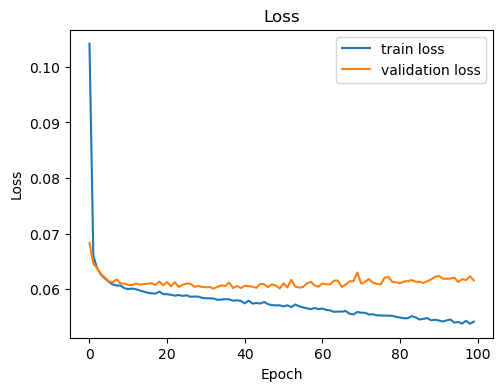

In [51]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

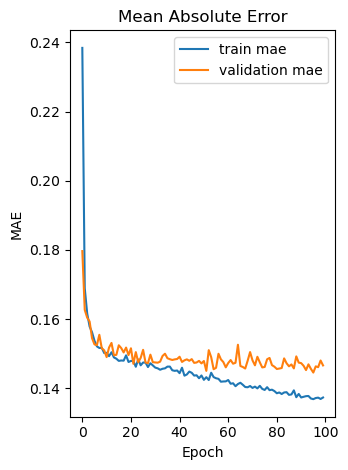

In [52]:
# MAE 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='validation mae')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

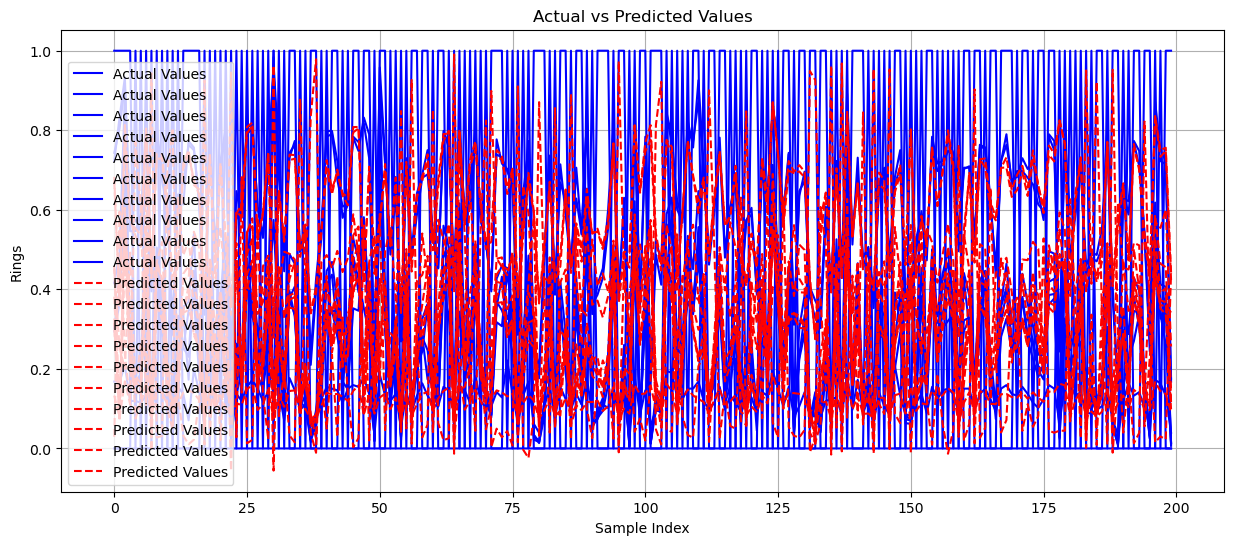

In [53]:
# 예측값과 실제값 비교 그래프
plt.figure(figsize=(15, 6))
plt.plot(y_test[:200], 'b-', label='Actual Values')
plt.plot(test_predict[:200], 'r--', label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Rings')
plt.legend()
plt.grid(True)
plt.show()

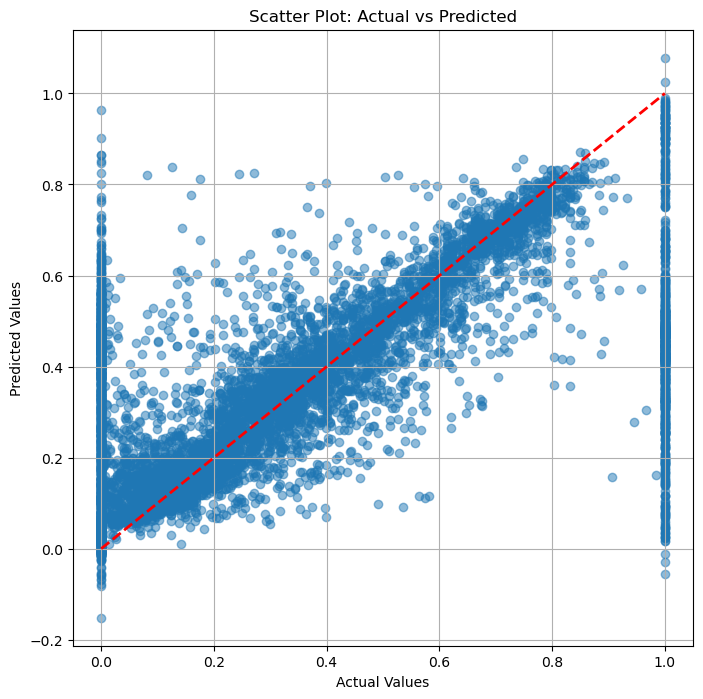

In [54]:
# 산점도 그래프
plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted')
plt.grid(True)
plt.show()